In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [29]:
# Load Train data from our github repo
url_train = 'https://raw.githubusercontent.com/tjayada/iANNwTF_Project/main/data/cleaned%20data%20(1)/data_without_columns_train.csv'
dataDF_train = pd.read_csv(url_train)

# Load Train label data from our github repo
url_train_labels = 'https://raw.githubusercontent.com/tjayada/iANNwTF_Project/main/data/cleaned%20data%20(1)/data_without_columns_train_labels.csv'
dataDF_train_labels = pd.read_csv(url_train_labels)

In [30]:
# drop indices 
dataDF_train = dataDF_train.drop("Unnamed: 0", axis = 1)
dataDF_train_labels = dataDF_train_labels.drop("Unnamed: 0", axis = 1)

In [31]:
# reshape input to be 3D [samples, timesteps, features]
dataDF_train = dataDF_train.to_numpy()
dataDF_train_labels = dataDF_train_labels.to_numpy()

dataDF_train = dataDF_train.reshape((dataDF_train.shape[0], 1, dataDF_train.shape[1]))

In [32]:
# split data into training and test
X_train, X_valid, y_train, y_valid = train_test_split(dataDF_train, dataDF_train_labels, test_size=0.25, shuffle=False)

In [33]:
# use functional API of tensorflow to generate model
# also using dropout and regularizers to prevent overfitting
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(200, kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1))

In [34]:
# use the functional API to compile our model with a Mean Squared Error as a loss function
# and using the optimizer Nadam with a learning rate of 0.01
model.compile(loss='mse',
                metrics=[tf.keras.metrics.RootMeanSquaredError()],
                optimizer=tf.keras.optimizers.Nadam(0.01))

In [35]:
# implement a early stopping function, that stops if the model doesnt improve for 20 epochs
# also saves the "best" model version of this period, instead of using the last one, that might be worse than
# the epochs before
callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),
             tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]


In [36]:
# train our model using the functional API 
# we train for 200 epochs, use early stopping and a validation set
history = model.fit(
    X_train, y_train,
    batch_size = 64,
    epochs=200,
    callbacks = [callback],
    validation_data=(X_valid, y_valid),
    verbose=1,
    shuffle = False,
    validation_split = 0.1
    )

Epoch 1/200
193/193 [==============================] - 18s 16ms/step - loss: 2455.2971 - root_mean_squared_error: 49.5396 - val_loss: 2459.5339 - val_root_mean_squared_error: 49.5807
Epoch 2/200
193/193 [==============================] - 2s 13ms/step - loss: 2210.5842 - root_mean_squared_error: 47.0018 - val_loss: 2430.8486 - val_root_mean_squared_error: 49.2835
Epoch 3/200
193/193 [==============================] - 3s 13ms/step - loss: 2092.7947 - root_mean_squared_error: 45.7117 - val_loss: 2277.8362 - val_root_mean_squared_error: 47.6829
Epoch 4/200
193/193 [==============================] - 2s 12ms/step - loss: 2005.4248 - root_mean_squared_error: 44.7268 - val_loss: 2199.2793 - val_root_mean_squared_error: 46.8357
Epoch 5/200
193/193 [==============================] - 2s 12ms/step - loss: 1931.4510 - root_mean_squared_error: 43.8764 - val_loss: 2130.5645 - val_root_mean_squared_error: 46.0816
Epoch 6/200
193/193 [==============================] - 2s 12ms/step - loss: 1863.7557 - r

In [37]:
# function to plot the losses of our model
def plot_loss(history):
  plt.plot(np.sqrt(history.history['loss']), label='loss')
  plt.plot(np.sqrt(history.history['val_loss']), label='val_loss')
  plt.title('LSTM - Data shuffled - No Location ')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.ylim(30,60)
  plt.legend()
  plt.grid(True)

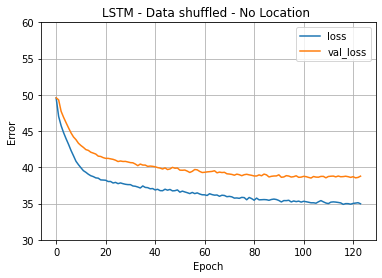

In [38]:
plot_loss(history)